# Importing the libraries

In [154]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import scipy
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from feature_engine.discretisers import EqualWidthDiscretiser

# Importing the files 

In [2]:
train=pd.read_csv("C:\\Users\\Arjit's Hardwork\\Documents\\all python files\\adult.data",header=None)

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test=pd.read_csv("C:\\Users\\Arjit's Hardwork\\Documents\\all python files\\adulttest.test",header=None)

In [5]:
test.shape

(16281, 15)

In [6]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
train.columns=['age', 'workclass', 'fnlwgt', 'education', 'educational-num',\
       'marital-status', 'occupation', 'relationship', 'race', 'gender',\
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',\
       'income']

In [9]:
test.columns=['age', 'workclass', 'fnlwgt', 'education', 'educational-num',\
       'marital-status', 'occupation', 'relationship', 'race', 'gender',\
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',\
       'income']

# DATA EXPLORATION

In [10]:
total=pd.concat([train,test])

In [11]:
total.shape

(48842, 15)

In [12]:
#Separate categorical and numberical columns
cat_col = [var for var in total if total[var].dtype=='O']
num_col=[var for var in total if total[var].dtype!='O']

In [13]:
cat_col,num_col

(['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'gender',
  'native-country',
  'income'],
 ['age',
  'fnlwgt',
  'educational-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week'])

In [14]:
for col in cat_col:
    print(f"--------------------{col.title()}-------------------------")
    total1= total[col].value_counts()
    percent = total[col].value_counts() / total.shape[0]
    df = pd.concat([total1,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')

--------------------Workclass-------------------------
                   total   percent
 Private           33906  0.694198
 Self-emp-not-inc   3862  0.079071
 Local-gov          3136  0.064207
 ?                  2799  0.057307
 State-gov          1981  0.040559
 Self-emp-inc       1695  0.034704
 Federal-gov        1432  0.029319
 Without-pay          21  0.000430
 Never-worked         10  0.000205


--------------------Education-------------------------
               total   percent
 HS-grad       15784  0.323164
 Some-college  10878  0.222718
 Bachelors      8025  0.164305
 Masters        2657  0.054400
 Assoc-voc      2061  0.042197
 11th           1812  0.037099
 Assoc-acdm     1601  0.032779
 10th           1389  0.028439
 7th-8th         955  0.019553
 Prof-school     834  0.017075
 9th             756  0.015478
 12th            657  0.013452
 Doctorate       594  0.012162
 5th-6th         509  0.010421
 1st-4th         247  0.005057
 Preschool        83  0.001699


---------

In [15]:
total["income"]=total["income"].str.strip()

In [16]:
total["income"].replace("<=50K.","<=50K",inplace=True)
total["income"].replace(">50K.",">50K",inplace=True)

In [17]:
total["native-country"]=total["native-country"].str.strip()

In [18]:
total["native-country"].sort_values().unique()

array(['?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
       'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England',
       'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',
       'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India',
       'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
       'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan',
       'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam',
       'Yugoslavia'], dtype=object)

In [19]:
groups={"Asia":("Cambodia","China","Hong","India","Japan" ,"Iran", "Laos","Philippines","Taiwan","Thailand", "Vietnam"),"NorthAmerica":("Canada","Cuba","Dominican-Republic","El-Salvador","Guatemala","Haiti","Honduras","Jamaica","Mexico","Nicaragua","Outlying-US(Guam-USVI-etc)","Puerto-Rico","Trinadad&Tobago","United-States"),"Other":("South","?"),"Europe":("England","France","Germany","Greece", "Holand-Netherlands", "Hungary" ,"Ireland","Italy","Poland","Portugal","Scotland","Yugoslavia"),"SouthAmerica":("Columbia","Ecuador","Peru")}

In [20]:
from typing import Any

def membership_map(s: pd.Series, groups: dict,
                   fillvalue: Any=-1) -> pd.Series:
    # Reverse & expand the dictionary key-value pairs
    groups = {x: k for k, v in groups.items() for x in v}
    return s.map(groups).fillna(fillvalue)

In [21]:
total["native-country"]=membership_map(total["native-country"], groups, fillvalue='other')

In [22]:
total.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,NorthAmerica,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,NorthAmerica,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,NorthAmerica,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,NorthAmerica,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,NorthAmerica,<=50K


In [23]:
total.isnull().any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [24]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
total['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
total['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

total['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [25]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
total['marital-status'].replace(to_replace = married ,value = 'Married',inplace = True)
total['marital-status'].replace(to_replace = separated,value = 'Separated',inplace = True)
total['marital-status'].value_counts()

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital-status, dtype: int64

In [26]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
total['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
total['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

total['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [27]:
total["occupation"].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [28]:
questioncols = ['occupation','workclass']
# Replace ? with Unknown
for col in questioncols:
    total.loc[total[col] == ' ?', col] = 'unknown'

# DATA VISUALIZATION

....Age.......


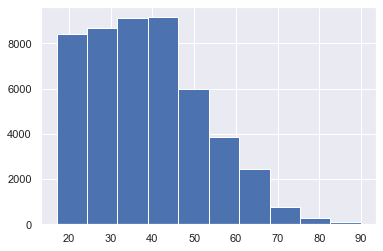

....Fnlwgt.......


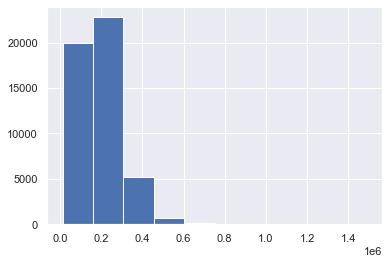

....Educational-Num.......


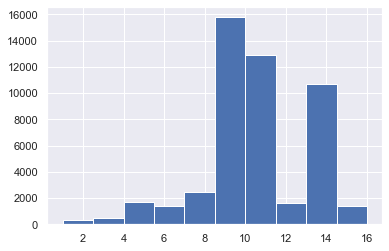

....Capital-Gain.......


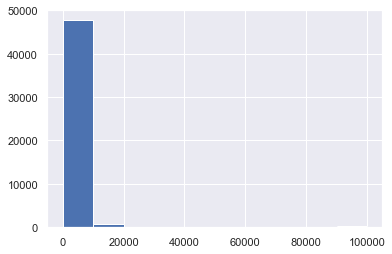

....Capital-Loss.......


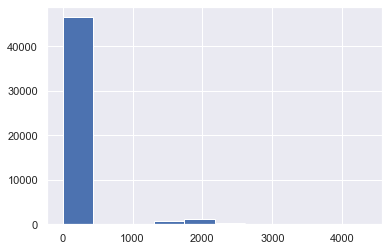

....Hours-Per-Week.......


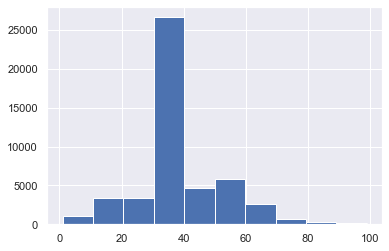

In [30]:
for i in num_col:
    print(f'....{i.title()}.......')
    plt.hist(total[i])
    plt.show()

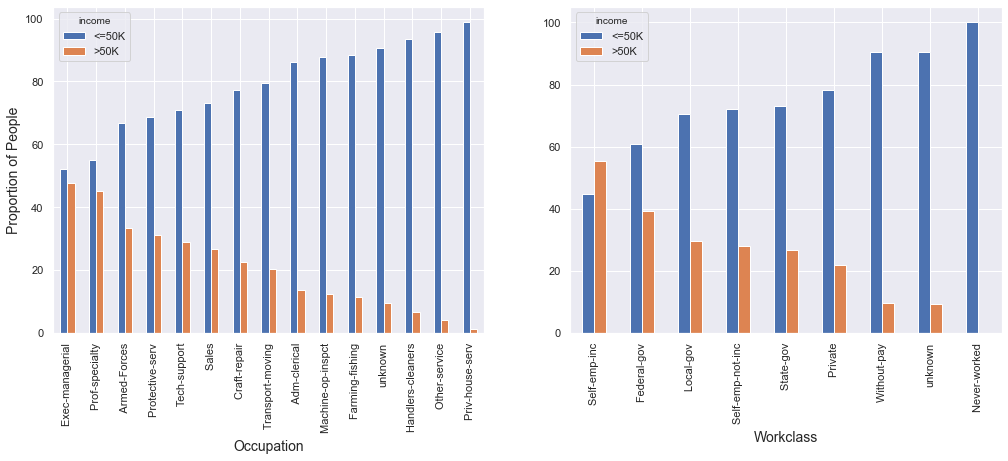

In [31]:
table_occu = pd.crosstab(total['occupation'], total['income'])
table_workclass = pd.crosstab(total['workclass'], total['income'])
table_edu = pd.crosstab(total['education'], total['income'])
table_marital = pd.crosstab(total['marital-status'],total['income'])
table_race = pd.crosstab(total['race'], total['income'])
table_sex = pd.crosstab(total['gender'], total['income'])
table_country = pd.crosstab(total['native-country'], total['income'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);

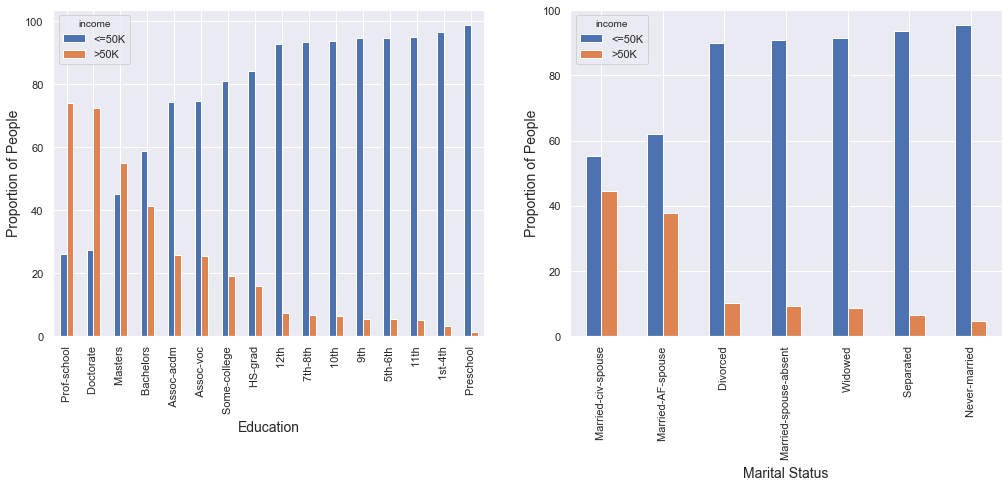

In [32]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

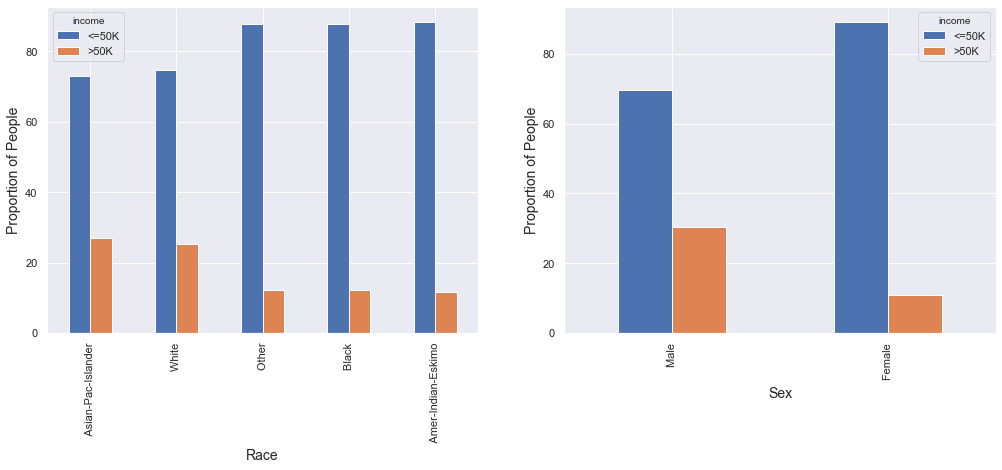

In [33]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

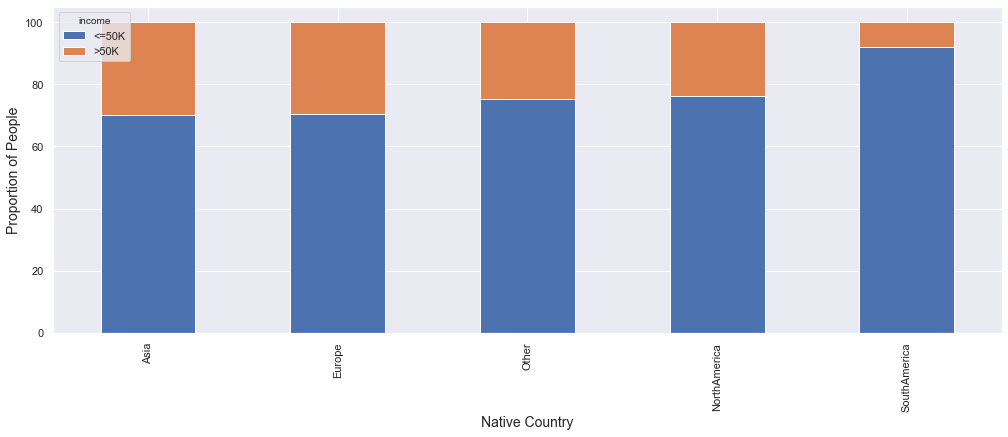

In [34]:
table_country = pd.crosstab(total['native-country'], total['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

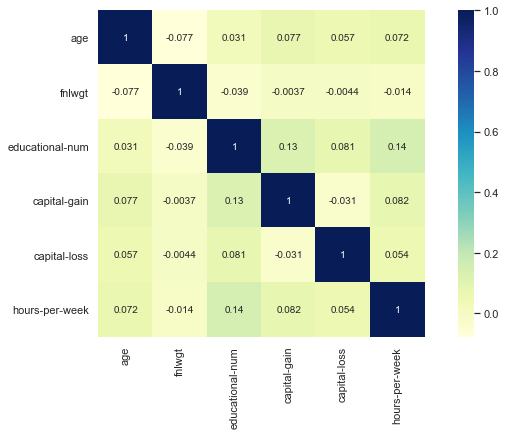

In [35]:
fig = plt.figure(figsize = (12,6))

sns.heatmap(total.corr(),annot = True,square = True,cmap="YlGnBu");

#here we can find that there is no significant correlation between the variables.

In [48]:
len(total[total["capital-gain"]==0])/total.shape[0]

0.9173866754023177

In [49]:
len(total[total["capital-loss"]==0])/total.shape[0]

0.9532779165472339

# FINDINGS

In [59]:
#1)Variables are Skewed needs transformation
#2)MOST of the capital gain and capital loss has data which is 0 so its better to drop them
#)Target Class is imbalanced needs to be checked
#)certain variables which are discrete can  have bins like age,hours-per-week,educational-num

In [54]:
#Dropping the capital gain and capital loss from the data

In [55]:
total.drop(["capital-gain","capital-loss"],axis=1,inplace=True)

In [56]:
total.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,NorthAmerica,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,NorthAmerica,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,NorthAmerica,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,NorthAmerica,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,NorthAmerica,<=50K


In [69]:
eq=EqualWidthDiscretiser(variables=["age","hours-per-week"])

In [71]:
eq=EqualWidthDiscretiser(variables=["educational-num"])

In [68]:
p.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,3,NorthAmerica,<=50K
1,4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1,NorthAmerica,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,3,NorthAmerica,<=50K
3,4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,3,NorthAmerica,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,3,NorthAmerica,<=50K


In [72]:
q=eq.fit_transform(p)

In [74]:
q.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,3,State-gov,77516,Bachelors,7,Never-married,Adm-clerical,Not-in-family,White,Male,3,NorthAmerica,<=50K
1,4,Self-emp-not-inc,83311,Bachelors,7,Married-civ-spouse,Exec-managerial,Husband,White,Male,1,NorthAmerica,<=50K
2,2,Private,215646,HS-grad,5,Divorced,Handlers-cleaners,Not-in-family,White,Male,3,NorthAmerica,<=50K
3,4,Private,234721,11th,3,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,3,NorthAmerica,<=50K
4,1,Private,338409,Bachelors,7,Married-civ-spouse,Prof-specialty,Wife,Black,Female,3,NorthAmerica,<=50K


In [90]:
X=q.drop("income",axis=1)
Y=q["income"]

In [93]:
y=Y.apply(lambda x:1 if x=="<=50K" else 0)

In [94]:
y.value_counts()

1    37155
0    11687
Name: income, dtype: int64

# Splitting the Dataset into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#preprocessing steps befor fitting the model Standardisation and One hot encoding

In [140]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.preprocessing import StandardScaler

In [141]:
s=StandardScaler()

In [142]:
ohe=OneHotCategoricalEncoder()

In [143]:
X_train=ohe.fit_transform(X_train)
X_test=ohe.fit_transform(X_test)

In [144]:
X_train_scaled=s.fit_transform(X_train)
X_test_scaled=s.fit_transform(X_test)

#Model Building

In [145]:
from sklearn.linear_model import LogisticRegression

In [163]:
lr=LogisticRegression( class_weight="balanced")

In [164]:
lr.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
lr.score(X_train_scaled,y_train)

0.7907651876298741

In [166]:
lr.score(X_test_scaled,y_test)

0.7566695619803946

In [170]:
param_grid_logreg = {'C':[0.0001,0.001,0.01,0.1,1,10,100]}

In [182]:
clf=GridSearchCV(lr,param_grid=param_grid_logreg,cv=50,scoring='accuracy', return_train_score=True )

In [183]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=50, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [185]:
clf.best_score_

0.7899078366832412